In [28]:
import pandas as pd

In [29]:
dataset=pd.read_csv("prePlacement.csv")

In [30]:
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.000000,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.000000,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.000000,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,288655.405405,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.000000,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.000000,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.000000,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.000000,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.000000,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [31]:
dataset.drop("sl_no",inplace=True,axis=1)

In [32]:
dataset.isnull().sum()

ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [33]:
qual=[]
quan=[]
for columnName in dataset.columns:
    if(dataset[columnName].dtype=='O'):
        #print("Qual")
        qual.append(columnName)     #append is to add into the list of columnname
    else:
       # print("Quan")
        quan.append(columnName)

In [34]:
quan

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [35]:
dataset[quan].cov()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,117.228377,60.348373,42.897137,37.659225,24.535952,1.976764e+04
hsc_p,60.348373,118.755706,34.819820,35.461678,22.555846,4.600806e+04
degree_p,42.897137,34.819820,54.151103,21.929469,17.272020,-8.064357e+03
etest_p,37.659225,35.461678,21.929469,176.251018,16.886973,1.571579e+05
mba_p,24.535952,22.555846,17.272020,16.886973,34.028376,6.611551e+04
salary,19767.643976,46008.057275,-8064.357161,157157.850783,66115.509283,5.999726e+09


In [36]:
# The variance between degree_p and etest_p is 21.92 (positive covariance but difference is not much high)
# The variance between etest_p and mba_p is 16.88 (positive covariance but difference is not much high)

In [37]:
dataset[quan].corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.023571
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.054506
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,-0.014148
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.152829
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.146324
salary,0.023571,0.054506,-0.014148,0.152829,0.146324,1.000000


In [38]:
# The relationship between mba_p and salary is 0.14(14%) here low degree positve correlation. if mba_p column increases the salary column also increased but relationship value is small

In [39]:
import seaborn as sns

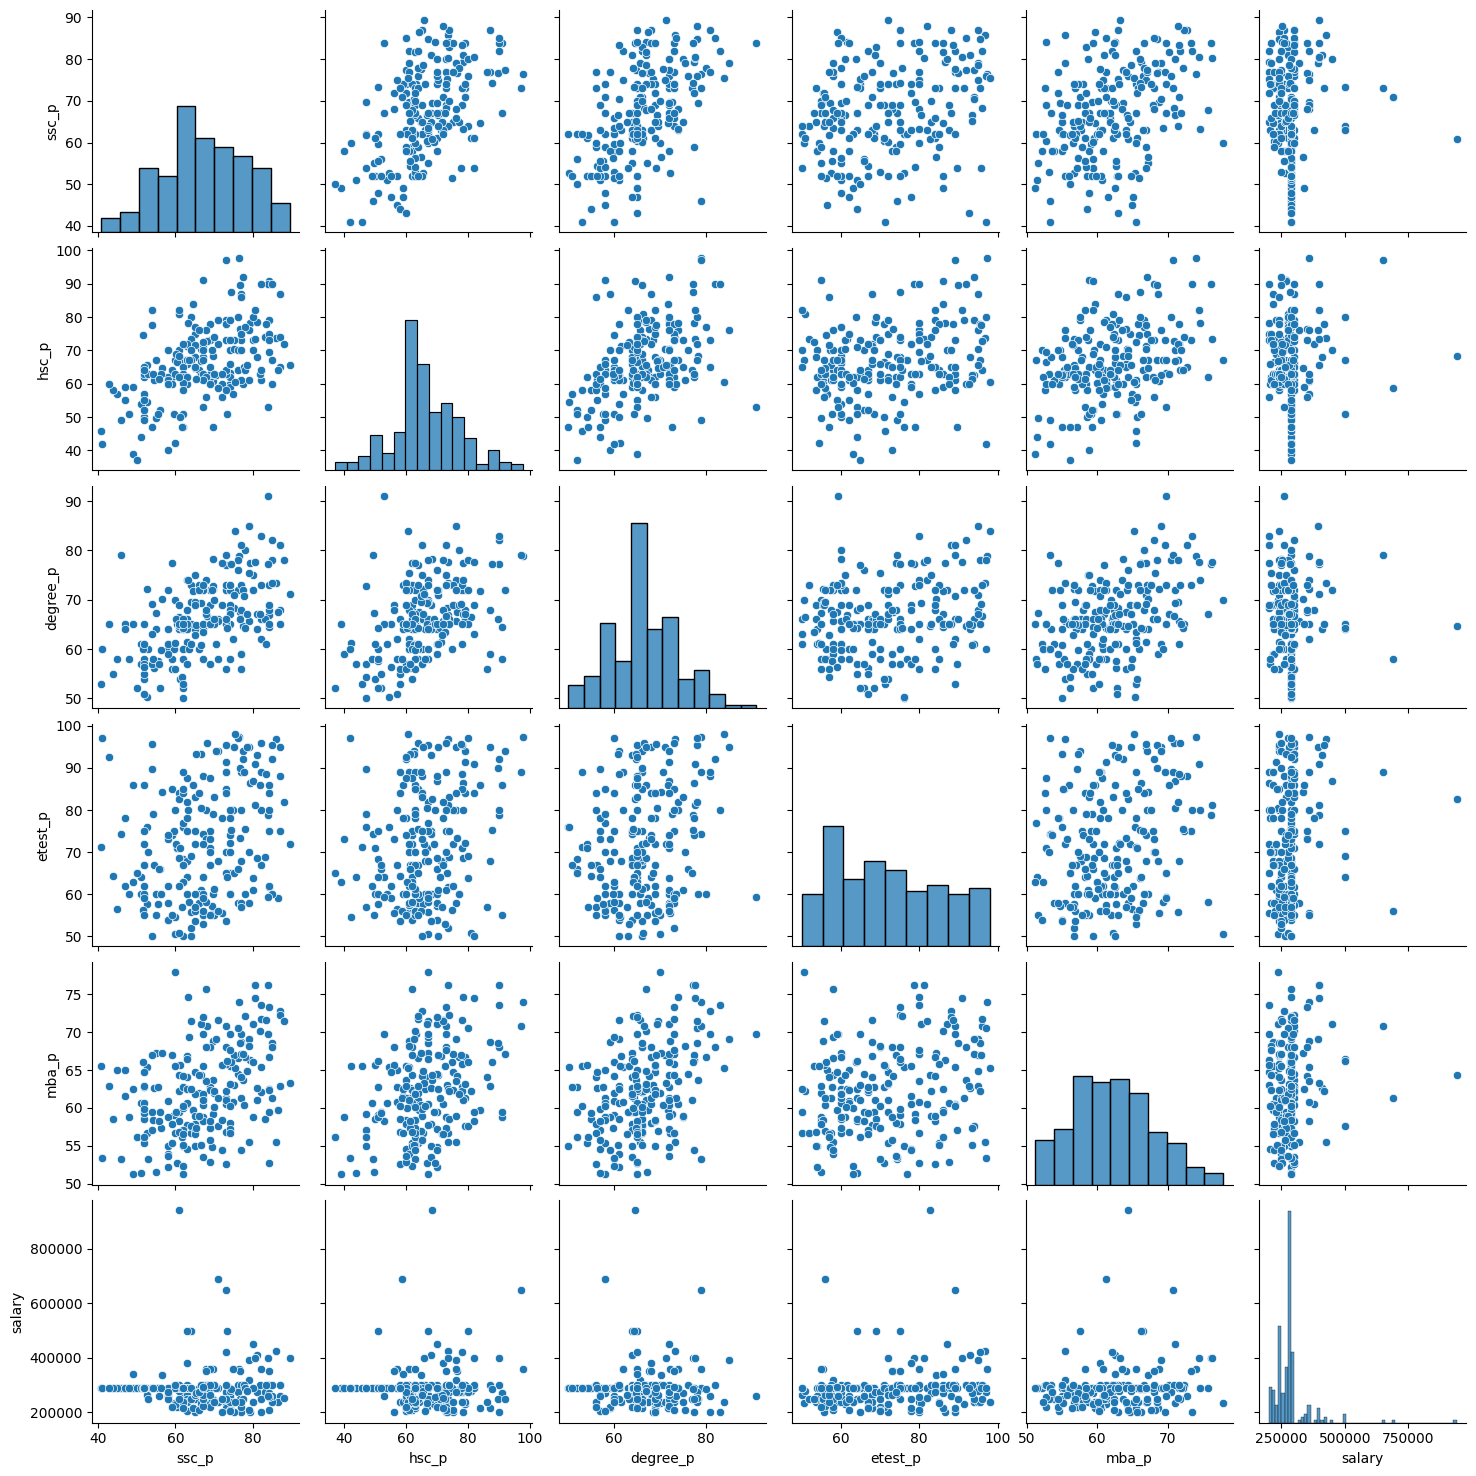

In [40]:
sns.pairplot(dataset[quan])

ds_encoded=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [41]:
dataset[quan].values

array([[6.70000000e+01, 9.10000000e+01, 5.80000000e+01, 5.50000000e+01,
        5.88000000e+01, 2.70000000e+05],
       [7.93300000e+01, 7.83300000e+01, 7.74800000e+01, 8.65000000e+01,
        6.62800000e+01, 2.00000000e+05],
       [6.50000000e+01, 6.80000000e+01, 6.40000000e+01, 7.50000000e+01,
        5.78000000e+01, 2.50000000e+05],
       ...,
       [6.70000000e+01, 6.70000000e+01, 7.30000000e+01, 5.90000000e+01,
        6.97200000e+01, 2.95000000e+05],
       [7.40000000e+01, 6.60000000e+01, 5.80000000e+01, 7.00000000e+01,
        6.02300000e+01, 2.04000000e+05],
       [6.20000000e+01, 5.80000000e+01, 5.30000000e+01, 8.90000000e+01,
        6.02200000e+01, 2.88655405e+05]])

In [42]:
df_numer=dataset[quan]

In [43]:
df_numer

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,67.00,91.00,58.00,55.0,58.80,270000.000000
1,79.33,78.33,77.48,86.5,66.28,200000.000000
2,65.00,68.00,64.00,75.0,57.80,250000.000000
3,56.00,52.00,52.00,66.0,59.43,288655.405405
4,85.80,73.60,73.30,96.8,55.50,425000.000000
...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.000000
211,58.00,60.00,72.00,74.0,53.62,275000.000000
212,67.00,67.00,73.00,59.0,69.72,295000.000000
213,74.00,66.00,58.00,70.0,60.23,204000.000000


In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif=pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return vif
    

In [63]:
calc_vif(df_numer)


,variables,VIF
0,etest_p,11.944567
1,salary,11.944567


In [62]:
df_numer.drop("degree_p",inplace=True,axis=1)

C:\Users\Sathish\AppData\Local\Temp\ipykernel_15096\2237169048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numer.drop("degree_p",inplace=True,axis=1)


In [47]:
# unpaired T-test is independent variable
#different groups (male,female) but same conditons(salary)

In [48]:
dataset[dataset['gender']=='M']['salary']

0      270000.000000
1      200000.000000
2      250000.000000
3      288655.405405
4      425000.000000
           ...      
209    216000.000000
210    400000.000000
211    275000.000000
212    295000.000000
214    288655.405405
Name: salary, Length: 139, dtype: float64

In [49]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
male=dataset[dataset['gender']=='M']['salary']
female=dataset[dataset['gender']=='F']['salary']   
ttest_ind(male,female)

TtestResult(statistic=np.float64(1.9001627265152634), pvalue=np.float64(0.058762394271226426), df=np.float64(213.0))

In [50]:
 # paired T-test is dependent variable
#same groups(male) but different conditons(ssc_p, hsc_p)
#groups ust be an categorical value and conditions must be an numerical value

In [51]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
male=dataset[dataset['gender']=='M']['ssc_p']
male1=dataset[dataset['gender']=='M']['hsc_p']
ttest_ind(male,male1)

TtestResult(statistic=np.float64(0.462536606114424), pvalue=np.float64(0.644060993886658), df=np.float64(276.0))

In [52]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
others=dataset[dataset["ssc_b"]=='Others']["salary"]
central=dataset[dataset["ssc_b"]=='Central']['salary']
ttest_ind(others,central)      

TtestResult(statistic=np.float64(0.06718399145137142), pvalue=np.float64(0.9464982502258081), df=np.float64(213.0))

In [53]:
# The Others and Central of "ssc_b" group with the condition "salary" is not similar because the pvalue is 0.94(94%) but actual pvalue 5% is acceptable

In [54]:
from scipy.stats import ttest_rel
commerce=dataset[dataset["hsc_s"]=='Commerce']["mba_p"]
commerce1=dataset[dataset["hsc_s"]=='Commerce']['etest_p']
ttest_rel(commerce,commerce1)  

TtestResult(statistic=np.float64(-7.868552092606871), pvalue=np.float64(2.4629264684549866e-12), df=np.int64(112))

In [55]:
# The 'commerce' student in 'mba_p' and 'etest_p' is not similar